In [21]:
import serial
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

ser = serial.Serial('COM3', baudrate=1000000)

In [22]:
value = ser.read(320 * 240 * 2)
value

b'*RDY*\x07\t\n\x08\t\n\n\n\t\t\t\n\t\n\t\x0b\x0b\n\n\x08\n\n\x08\n\n\x0b\n\n\n\n\x0b\n\t\x0b\t\x0b\n\x08\t\n\t\n\x0b\x0b\n\t\n\n\t\n\n\x0c\x0b\n\t\n\x08\n\t\t\t\t\n\n\n\n\x0b\n\n\x0b\n\t\n\n\n\x08\t\t\t\t\t\n\x08\n\x0b\n\x0c\x08\n\x0b\n\x0b\n\x0b\t\n\n\x0b\t\n\n\x08\n\x0b\n\t\x0c\x0b\n\n\n\x0b\x0b\n\t\n\x0c\x0b\x0c\n\x0b\x0b\x0b\n\n\n\n\x0b\n\x08\x08\n\t\t\n\n\n\x0b\x0b\n\x08\t\x0c\x08\n\n\t\x0b\n\x0b\x0b\n\x0b\x0b\n\t\t\x0b\n\n\n\x0b\x08\x0b\n\n\x0c\n\t\x0b\t\x0b\x0b\x0c\x0b\n\n\x0c\x0b\t\x0b\n\n\n\n\n\n\t\n\x0c\x0c\r\n\n\n\x0b\t\x0b\n\x0b\n\x0b\x0b\x0b\x0b\x0b\n\x0b\x0b\x0b\x0b\x0b\x0c\t\n\x0b\x0b\n\x0b\x0b\n\x0b\x0c\r\x0b\n\n\n\n\n\t\n\x08\t\x08\n\x0b\x0b\x0b\x0b\x0b\x0c\x0c\x0b\x0b\x0e\x0e\r\x0b\x0c\x0c\r\x0c\x0b\r\x0c\r\x0e\x0c\x0c\x0c\x0c\x0e\r\r\x0e\x0e\x0f\x0e\x0e\x0f\x0f\x0e\x0e\x0e\x0e\x0f\x0f\x0e\x0f\x0f\x11\x0f\x0f\x10\x10\x11\x10\x0f\x10\x0e\x0f\x0f\x0f\x10\x10\x10\x10\x10\x10\x0f\x0f\x0e\x0f\x10\x0f\x0e\x0e\r\x0e\x0f\r\r\r\r\x0f\x0e\x11\x11\t\x08\x08\n\n\n\t\t\x08\n\n\n\

In [23]:
image_data = np.frombuffer(value, dtype=np.uint8)
image_data = image_data.reshape((320, 240, 2))
print(image_data.shape)
image_data

(320, 240, 2)


array([[[42, 82],
        [68, 89],
        [42,  7],
        ...,
        [12, 12],
        [12,  8],
        [10, 11]],

       [[10, 10],
        [10, 10],
        [12, 11],
        ...,
        [15, 15],
        [14, 15],
        [17, 14]],

       [[13, 15],
        [13, 13],
        [ 6, 10],
        ...,
        [11, 13],
        [11, 12],
        [11, 11]],

       ...,

       [[48, 49],
        [48, 48],
        [49, 50],
        ...,
        [71, 71],
        [71, 70],
        [71, 67]],

       [[66, 63],
        [59, 56],
        [54, 52],
        ...,
        [47, 46],
        [46, 48],
        [48, 48]],

       [[48, 49],
        [50, 48],
        [47, 47],
        ...,
        [71, 71],
        [72, 71],
        [67, 64]]], dtype=uint8)

In [24]:
converted_bgr = cv.cvtColor(image_data, cv.COLOR_YUV2BGR_Y422)
converted_bgr

array([[[  0, 159,   0],
        [  0, 167,   0],
        [  0, 130,   0],
        ...,
        [  0, 140,   0],
        [  0, 141,   0],
        [  0, 141,   0]],

       [[  0, 142,   0],
        [  0, 142,   0],
        [  0, 140,   0],
        ...,
        [  0, 136,   0],
        [  0, 135,   0],
        [  0, 135,   0]],

       [[  0, 138,   0],
        [  0, 138,   0],
        [  0, 144,   0],
        ...,
        [  0, 141,   0],
        [  0, 141,   0],
        [  0, 141,   0]],

       ...,

       [[  0, 135,   0],
        [  0, 134,   0],
        [  0, 136,   0],
        ...,
        [  0, 133,   0],
        [  0, 131,   0],
        [  0, 128,   0]],

       [[  0, 135,   0],
        [  0, 127,   0],
        [  0, 135,   0],
        ...,
        [  0, 132,   0],
        [  0, 134,   0],
        [  0, 134,   0]],

       [[  0, 133,   0],
        [  0, 132,   0],
        [  0, 133,   0],
        ...,
        [  0, 133,   0],
        [  0, 136,   0],
        [  0, 127,   0]]

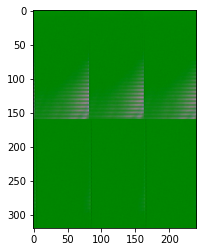

In [25]:
plt.imshow(converted_bgr)

In [26]:
plt.imsave('test2.png', converted_bgr)

In [27]:
ser.close()